In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#data from https://wcc.sc.egov.usda.gov/nwcc/rgrpt?report=precsnotelmon&state=UT&operation=View
#number of stations = 11
nos = 11
pd.set_option('display.float_format', lambda x: '%.1f' % x)
#read the csv to pandas
snow = pd.read_csv("../data/snotel_wtr_yr_2022_all.csv")
#convert to cm
snow = snow.apply(lambda x: x*2.54 if x.name in ['TGL','BLP','BLT','FRM','PAR','TIM','PAY','CHE','HAY','KOL','CAS'] else x)
#stns holds the strings for the 11 stations
stns=list(snow)
print(type(stns))
print(stns[1:nos+1])
snow

<class 'list'>
['TGL', 'BLP', 'BLT', 'FRM', 'PAR', 'TIM', 'PAY', 'CHE', 'HAY', 'KOL', 'CAS']


YEAR   TGL   BLP   BLT   FRM   PAR   TIM  PAY  CHE   HAY   KOL   CAS
0   1981  88.9 100.8  67.8  86.6  70.6  85.6 52.8 79.2  94.7  76.2  65.0
1   1982 206.2 183.4 146.3 177.8 104.6 131.3 83.6 96.5 102.1 112.5  80.8
2   1983 140.2 212.3 145.0 165.4 104.6 125.0 88.6 99.1 113.3 133.1  94.5
3   1984 157.5 257.0 141.5 166.6 110.2 104.1 89.9 78.5  89.4  77.7  69.6
4   1985 112.8 143.3 102.6 118.9  89.2 111.8 72.4 85.6  83.6  83.8  70.6
5   1986 175.3 235.7 161.5 172.0  98.0 138.7 81.0 86.6  96.5  89.7  70.6
6   1987  74.7 119.6  87.1  74.9  59.4  63.2 57.9 74.4  65.0  68.8  63.8
7   1988  90.2 103.9  74.9  81.3  56.4  53.3 55.6 52.6  61.7 101.6  73.4
8   1989 126.7 131.8 100.1 119.1  78.7  70.6 51.8 58.2  81.3  54.1  49.0
9   1990  88.6 106.2  84.3  88.4  61.7  91.7 53.1 78.5  82.8  67.8  52.6
10  1991 102.1 116.1  88.4 108.5  77.0  78.5 56.4 78.2  90.7  73.2  48.5
11  1992  86.6  81.8  66.0  88.6  59.7  58.4 50.0 73.2  64.3  94.5  70.1
12  1993 150.6 197.1 145.8 158.2 102.6 129.8 81.3 73.2  97.3 112.3  76.5
13  1994  88.1  97.0  80.3 104.1  69.8  72.1 54.1 79.2  82.3  69.1  59.4
14  1995 126.7 181.4 117.6 166.6 107.4 122.2 90.4 82.3 114.8 120.7  84.1
15  1996 131.3 125.0  93.2 119.4  81.5  77.5 59.9 85.9 106.9  55.6  47.0
16  1997 175.0 200.2 134.1 156.2  96.5 115.3 73.7 87.4  94.5  92.2  82.0
17  1998 120.4 184.7 113.8 169.4  95.2 104.9 91.7 94.5 109.2  80.0  73.4
18  1999 126.0 140.0  97.3 130.3  92.2  93.7 66.8 87.4  70.1  71.1  49.0
19  2000  95.0 115.1  79.8 106.4  65.5  68.6 50.8 78.2  81.3  65.8  53.1
20  2001  87.6 108.0  73.2 109.2  63.5  63.2 50.3 70.1  67.6  86.6  60.7
21  2002  94.5 120.1  88.1 117.3  70.9  69.8 45.7 55.6  67.6  34.0  36.3
22  2003 103.1  95.8  70.1  87.9  60.5  62.7 58.7 79.0  75.2  57.1  44.2
23  2004 103.1 132.6  89.7 133.9  76.5  76.5 63.2 92.5  82.8  62.5  55.6
24  2005 117.1 209.8 150.4 167.6  94.0 139.4 81.0 73.4  95.8 172.5 110.2
25  2006 134.1 184.2 135.4 158.2  96.5  99.8 65.0 75.7  98.3  71.1  63.5
26  2007  79.0 105.7  79.2 105.2  65.3  63.5 46.5 66.3  75.2  65.8  62.0
27  2008 114.6 130.6  93.2 124.2  80.3  79.2 65.3 65.3  91.7  81.8  53.8
28  2009 133.9 184.7 130.3 148.8  86.4 111.0 71.4 70.9  87.9  79.5  60.7
29  2010 106.2 120.4  80.3 112.0  79.5  88.9 61.5 92.5 109.2  88.6  74.2
30  2011 177.8 209.8 161.8 188.0 119.1 156.2 85.9 97.0 102.6 135.6 100.1
31  2012  96.3 108.5  82.5  80.5  55.4  66.3 49.5 59.9  68.8  75.4  63.0
32  2013  84.3  89.7  60.7  96.8  72.6  61.7 48.8 61.2  71.6  80.0  71.4
33  2014 132.8 121.4  95.2 105.4  77.7  70.1 51.8 64.8 102.6  64.5  58.2
34  2015 100.8 106.4  79.5 108.7  66.8  58.9 45.0 75.9  70.1  61.0  57.4
35  2016 113.0 112.0  83.8 103.9  67.8  73.9 50.5 86.6  94.7  90.2  67.6
36  2017 202.9 193.3 156.0 151.6  90.7 126.2 63.5 66.0  95.8  92.7  86.4
37  2018 100.8  75.4  66.8  70.9  58.4  57.1 42.2 58.2  69.8  51.6  49.0
38  2019 121.4 182.9 128.5 154.4  93.7 126.7 87.1 95.2  95.2 110.2  80.3
39  2020 120.1  91.2  67.6  95.5  66.8  58.9 43.4 49.3  62.7  66.5  44.2
40  2021  82.8  64.0  63.0  90.9  72.6  68.6 49.8 64.8  75.7  66.5  54.9
41  2022 100.3  67.1  77.2  99.8  74.9  67.1 46.7 71.9  81.3  71.4  62.5

In [3]:
#question 1
#convert year column to pandas index
# YEAR should now have replaced the numbers in bold face above
snow = snow.set_index("YEAR")
snow

TGL   BLP   BLT   FRM   PAR   TIM  PAY  CHE   HAY   KOL   CAS
YEAR                                                                
1981  88.9 100.8  67.8  86.6  70.6  85.6 52.8 79.2  94.7  76.2  65.0
1982 206.2 183.4 146.3 177.8 104.6 131.3 83.6 96.5 102.1 112.5  80.8
1983 140.2 212.3 145.0 165.4 104.6 125.0 88.6 99.1 113.3 133.1  94.5
1984 157.5 257.0 141.5 166.6 110.2 104.1 89.9 78.5  89.4  77.7  69.6
1985 112.8 143.3 102.6 118.9  89.2 111.8 72.4 85.6  83.6  83.8  70.6
1986 175.3 235.7 161.5 172.0  98.0 138.7 81.0 86.6  96.5  89.7  70.6
1987  74.7 119.6  87.1  74.9  59.4  63.2 57.9 74.4  65.0  68.8  63.8
1988  90.2 103.9  74.9  81.3  56.4  53.3 55.6 52.6  61.7 101.6  73.4
1989 126.7 131.8 100.1 119.1  78.7  70.6 51.8 58.2  81.3  54.1  49.0
1990  88.6 106.2  84.3  88.4  61.7  91.7 53.1 78.5  82.8  67.8  52.6
1991 102.1 116.1  88.4 108.5  77.0  78.5 56.4 78.2  90.7  73.2  48.5
1992  86.6  81.8  66.0  88.6  59.7  58.4 50.0 73.2  64.3  94.5  70.1
1993 150.6 197.1 145.8 158.2 102.6 129.8 81.3 73.2  97.3 112.3  76.5
1994  88.1  97.0  80.3 104.1  69.8  72.1 54.1 79.2  82.3  69.1  59.4
1995 126.7 181.4 117.6 166.6 107.4 122.2 90.4 82.3 114.8 120.7  84.1
1996 131.3 125.0  93.2 119.4  81.5  77.5 59.9 85.9 106.9  55.6  47.0
1997 175.0 200.2 134.1 156.2  96.5 115.3 73.7 87.4  94.5  92.2  82.0
1998 120.4 184.7 113.8 169.4  95.2 104.9 91.7 94.5 109.2  80.0  73.4
1999 126.0 140.0  97.3 130.3  92.2  93.7 66.8 87.4  70.1  71.1  49.0
2000  95.0 115.1  79.8 106.4  65.5  68.6 50.8 78.2  81.3  65.8  53.1
2001  87.6 108.0  73.2 109.2  63.5  63.2 50.3 70.1  67.6  86.6  60.7
2002  94.5 120.1  88.1 117.3  70.9  69.8 45.7 55.6  67.6  34.0  36.3
2003 103.1  95.8  70.1  87.9  60.5  62.7 58.7 79.0  75.2  57.1  44.2
2004 103.1 132.6  89.7 133.9  76.5  76.5 63.2 92.5  82.8  62.5  55.6
2005 117.1 209.8 150.4 167.6  94.0 139.4 81.0 73.4  95.8 172.5 110.2
2006 134.1 184.2 135.4 158.2  96.5  99.8 65.0 75.7  98.3  71.1  63.5
2007  79.0 105.7  79.2 105.2  65.3  63.5 46.5 66.3  75.2  65.8  62.0
2008 114.6 130.6  93.2 124.2  80.3  79.2 65.3 65.3  91.7  81.8  53.8
2009 133.9 184.7 130.3 148.8  86.4 111.0 71.4 70.9  87.9  79.5  60.7
2010 106.2 120.4  80.3 112.0  79.5  88.9 61.5 92.5 109.2  88.6  74.2
2011 177.8 209.8 161.8 188.0 119.1 156.2 85.9 97.0 102.6 135.6 100.1
2012  96.3 108.5  82.5  80.5  55.4  66.3 49.5 59.9  68.8  75.4  63.0
2013  84.3  89.7  60.7  96.8  72.6  61.7 48.8 61.2  71.6  80.0  71.4
2014 132.8 121.4  95.2 105.4  77.7  70.1 51.8 64.8 102.6  64.5  58.2
2015 100.8 106.4  79.5 108.7  66.8  58.9 45.0 75.9  70.1  61.0  57.4
2016 113.0 112.0  83.8 103.9  67.8  73.9 50.5 86.6  94.7  90.2  67.6
2017 202.9 193.3 156.0 151.6  90.7 126.2 63.5 66.0  95.8  92.7  86.4
2018 100.8  75.4  66.8  70.9  58.4  57.1 42.2 58.2  69.8  51.6  49.0
2019 121.4 182.9 128.5 154.4  93.7 126.7 87.1 95.2  95.2 110.2  80.3
2020 120.1  91.2  67.6  95.5  66.8  58.9 43.4 49.3  62.7  66.5  44.2
2021  82.8  64.0  63.0  90.9  72.6  68.6 49.8 64.8  75.7  66.5  54.9
2022 100.3  67.1  77.2  99.8  74.9  67.1 46.7 71.9  81.3  71.4  62.5

xm,ym: 76.2 82.5
xs,ys: 12.8 25.5


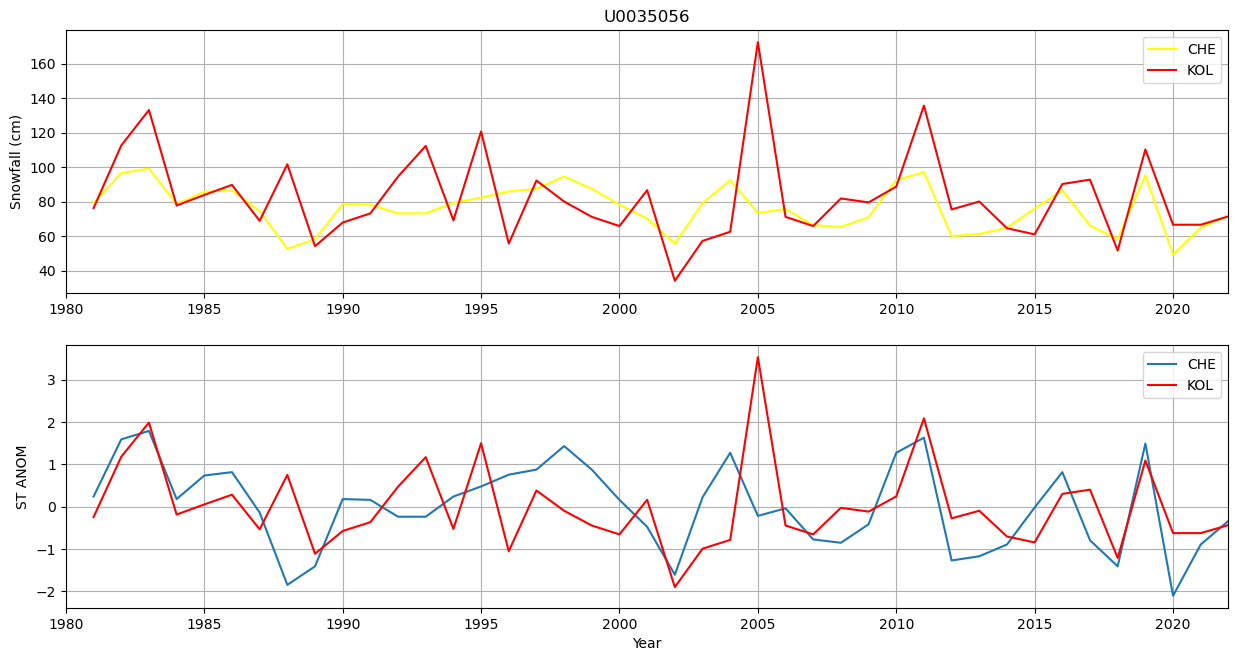

In [4]:
#plot actual totals and standardized anomaly totals
#Question 2. Plot Chepeta vs Kolob over all years 
# because YEAR is the index, you only need to plot the appropriate columns: snow.XXX
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow.CHE,label='CHE',color='yellow')
ax1.plot(snow.KOL,color='red',label='KOL')

ax1.set_ylabel('Snowfall (cm)')
ax1.set(xlim=(1980,2022))
ax1.grid()
ax1.legend()

#match notes - set CHE and KOL to x and y respectively. again should be using something like snow.XXX
x = snow.CHE
y = snow.KOL
#print(x,y)

#get means for these two time series as xm and ym
xm = np.mean(x)
ym = np.mean(y)
#get st devs for these two time series as xs and ys
xs = np.std(x)
ys = np.std(y)

print('xm,ym: %.1f %.1f' % (xm,ym))
print('xs,ys: %.1f %.1f' % (xs,ys))

#get anomalies as xprime and yprime

xprime = x - xm
yprime = y - ym

#get standardized anomalies as xstar and ystar
xstar = xprime/xs
ystar = yprime/ys

#plot standardize anomalies
#plot anomalies
ax2.plot(xstar,label='CHE')
ax2.plot(ystar,label='KOL',color='red')
ax2.legend()
ax2.set(xlim=(1980,2022))
ax2.grid()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')
#must have your unid on ALL figures
ax1.set_title('U0035056')
plt.savefig('figure_assign_1.png')

In [5]:
# question 3. use pandas to compute the spearman correlation between the Chepeta and Kolob time series
#create a dataframe vals with just the two time series
vals = snow[['CHE','KOL']]

#Spearman correlation: robust and resistant sorts the values first and then compares
r_sc= vals.corr(method='spearman')
print(r_sc)

#Question 4. How much variance of the Chepeta time series is explained by the Kolob time series?

expl_var = 100. * r_sc**2
print(expl_var)

     CHE  KOL
CHE  1.0  0.4
KOL  0.4  1.0
      CHE   KOL
CHE 100.0  14.7
KOL  14.7 100.0


In [6]:
#Question 5. compute a linear estimate of Kolob SWE from Chepeta SWE
# over the range of anomalies xhat from -50 to 50 at an interval of 1

#determine and print the total number of times, n, from the pandas index of the snow dataframe
n = snow.index.size
print(n)

# compute the covariance between the two times and standard deviations for each time series
# then compute the slope of the regression

#using linear algebra

covar = (np.dot(xprime,yprime))/n
varx = (np.dot(xprime,xprime))/n
vary = (np.dot(yprime,yprime))/n
b = covar/varx


xhat = np.arange(-50,51,1)
yhat = b * xhat
print(xhat,yhat)

42
[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50] [-39.13304512 -38.35038422 -37.56772331 -36.78506241 -36.00240151
 -35.21974061 -34.43707971 -33.6544188  -32.8717579  -32.089097
 -31.3064361  -30.52377519 -29.74111429 -28.95845339 -28.17579249
 -27.39313158 -26.61047068 -25.82780978 -25.04514888 -24.26248797
 -23.47982707 -22.69716617 -21.91450527 -21.13184436 -20.34918346
 -19.56652256 -18.78386166 -18.00120075 -17.21853985 -16.43587895
 -15.65321805 -14.87055715 -14.08789624 -13.30523534 -12.52257444
 -11.73991354 -10.95725263 -10.17459173  -9.39193083  -8.60926993
  -7.82660902  -7.04394812  -6.26128722  -5.47862632  -4.695

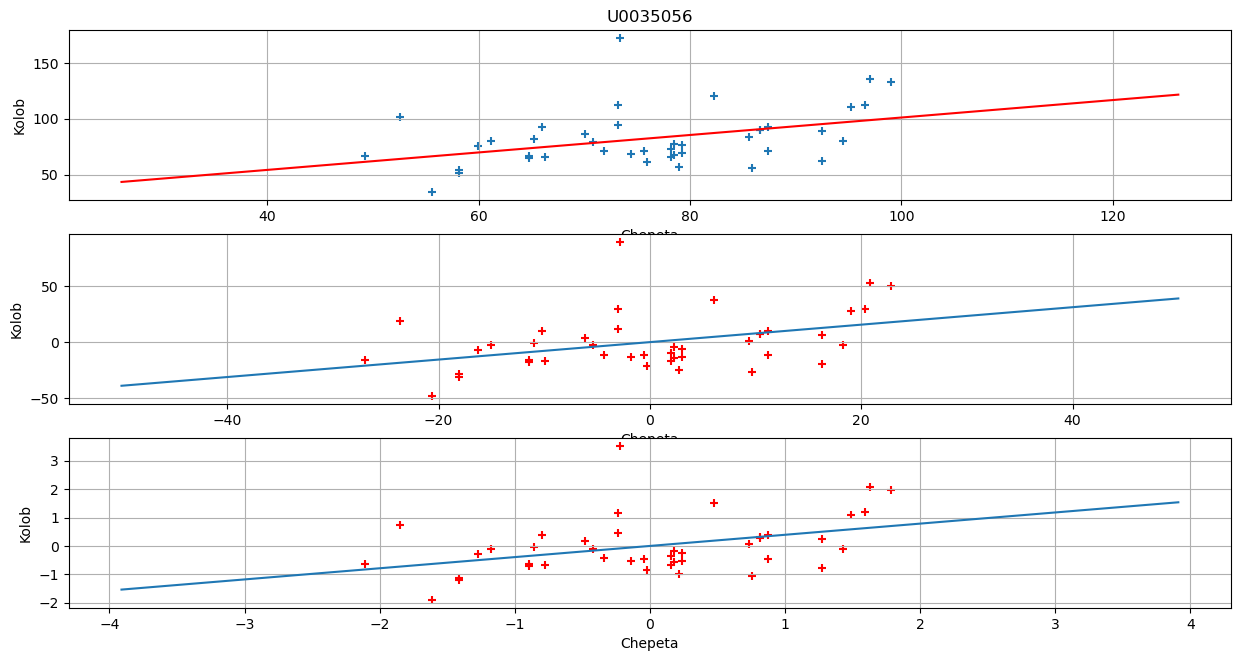

In [7]:
#Question 6 plot the scatter of values, anomalies and std anomalies as 3 subplots
#each figure should have the appropriate regression line
XH = xm+xhat
YH = ym+yhat
#print(XH,YH)
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+')
ax1.plot(XH,YH,color='red')
ax1.grid()
ax1.set_xlabel('Chepeta')
ax1.set_ylabel('Kolob')
ax2.scatter(xprime,yprime,marker='+',color='red')
ax2.plot(xhat,yhat)
ax2.grid()
ax2.set_xlabel('Chepeta')
ax2.set_ylabel('Kolob')
ax3.scatter(xstar,ystar,marker='+',color='red')
ax3.plot(xhat/xs,yhat/ys)
ax3.grid()
ax3.set_xlabel('Chepeta')
ax3.set_ylabel('Kolob')
plt.savefig('figure_4.3.png')

ax1.set_title('U0035056')
plt.savefig('figure_assign_2.png')

In [10]:
# Question 7
#compute the standardized anomalies for each location
#there is no need to drop the YEAR column
#compute the mean and standard deviation for axis=0

xtm = snow.mean(axis=0)
xts = snow.std(axis=0,ddof=0)
print ('means',xtm)
print('stds',xts)

#fill dataframe zstar with standardized anomalies. use the mean and std dev computed above
zstar = (snow -xtm)/xts
#show the values
zstar

means TGL   118.3
BLP   139.2
BLT   101.0
FRM   123.1
PAR    80.3
TIM    89.1
PAY    62.7
CHE    76.2
HAY    86.3
KOL    82.5
CAS    65.5
dtype: float64
stds TGL   32.3
BLP   48.4
BLT   30.6
FRM   32.6
PAR   16.6
TIM   28.0
PAY   15.1
CHE   12.8
HAY   14.9
KOL   25.5
CAS   15.5
dtype: float64


TGL  BLP  BLT  FRM  PAR  TIM  PAY  CHE  HAY  KOL  CAS
YEAR                                                       
1981 -0.9 -0.8 -1.1 -1.1 -0.6 -0.1 -0.7  0.2  0.6 -0.2 -0.0
1982  2.7  0.9  1.5  1.7  1.5  1.5  1.4  1.6  1.1  1.2  1.0
1983  0.7  1.5  1.4  1.3  1.5  1.3  1.7  1.8  1.8  2.0  1.9
1984  1.2  2.4  1.3  1.3  1.8  0.5  1.8  0.2  0.2 -0.2  0.3
1985 -0.2  0.1  0.1 -0.1  0.5  0.8  0.6  0.7 -0.2  0.1  0.3
1986  1.8  2.0  2.0  1.5  1.1  1.8  1.2  0.8  0.7  0.3  0.3
1987 -1.4 -0.4 -0.5 -1.5 -1.3 -0.9 -0.3 -0.1 -1.4 -0.5 -0.1
1988 -0.9 -0.7 -0.8 -1.3 -1.4 -1.3 -0.5 -1.8 -1.7  0.7  0.5
1989  0.3 -0.2 -0.0 -0.1 -0.1 -0.7 -0.7 -1.4 -0.3 -1.1 -1.1
1990 -0.9 -0.7 -0.5 -1.1 -1.1  0.1 -0.6  0.2 -0.2 -0.6 -0.8
1991 -0.5 -0.5 -0.4 -0.4 -0.2 -0.4 -0.4  0.2  0.3 -0.4 -1.1
1992 -1.0 -1.2 -1.1 -1.1 -1.2 -1.1 -0.8 -0.2 -1.5  0.5  0.3
1993  1.0  1.2  1.5  1.1  1.3  1.5  1.2 -0.2  0.7  1.2  0.7
1994 -0.9 -0.9 -0.7 -0.6 -0.6 -0.6 -0.6  0.2 -0.3 -0.5 -0.4
1995  0.3  0.9  0.5  1.3  1.6  1.2  1.8  0.5  1.9  1.5  1.2
1996  0.4 -0.3 -0.3 -0.1  0.1 -0.4 -0.2  0.8  1.4 -1.1 -1.2
1997  1.8  1.3  1.1  1.0  1.0  0.9  0.7  0.9  0.6  0.4  1.1
1998  0.1  0.9  0.4  1.4  0.9  0.6  1.9  1.4  1.5 -0.1  0.5
1999  0.2  0.0 -0.1  0.2  0.7  0.2  0.3  0.9 -1.1 -0.4 -1.1
2000 -0.7 -0.5 -0.7 -0.5 -0.9 -0.7 -0.8  0.2 -0.3 -0.7 -0.8
2001 -1.0 -0.6 -0.9 -0.4 -1.0 -0.9 -0.8 -0.5 -1.3  0.2 -0.3
2002 -0.7 -0.4 -0.4 -0.2 -0.6 -0.7 -1.1 -1.6 -1.3 -1.9 -1.9
2003 -0.5 -0.9 -1.0 -1.1 -1.2 -0.9 -0.3  0.2 -0.7 -1.0 -1.4
2004 -0.5 -0.1 -0.4  0.3 -0.2 -0.5  0.0  1.3 -0.2 -0.8 -0.6
2005 -0.0  1.5  1.6  1.4  0.8  1.8  1.2 -0.2  0.6  3.5  2.9
2006  0.5  0.9  1.1  1.1  1.0  0.4  0.2 -0.0  0.8 -0.4 -0.1
2007 -1.2 -0.7 -0.7 -0.6 -0.9 -0.9 -1.1 -0.8 -0.7 -0.7 -0.2
2008 -0.1 -0.2 -0.3  0.0  0.0 -0.4  0.2 -0.9  0.4 -0.0 -0.7
2009  0.5  0.9  1.0  0.8  0.4  0.8  0.6 -0.4  0.1 -0.1 -0.3
2010 -0.4 -0.4 -0.7 -0.3 -0.0 -0.0 -0.1  1.3  1.5  0.2  0.6
2011  1.8  1.5  2.0  2.0  2.3  2.4  1.5  1.6  1.1  2.1  2.2
2012 -0.7 -0.6 -0.6 -1.3 -1.5 -0.8 -0.9 -1.3 -1.2 -0.3 -0.2
2013 -1.1 -1.0 -1.3 -0.8 -0.5 -1.0 -0.9 -1.2 -1.0 -0.1  0.4
2014  0.4 -0.4 -0.2 -0.5 -0.2 -0.7 -0.7 -0.9  1.1 -0.7 -0.5
2015 -0.5 -0.7 -0.7 -0.4 -0.8 -1.1 -1.2 -0.0 -1.1 -0.8 -0.5
2016 -0.2 -0.6 -0.6 -0.6 -0.7 -0.5 -0.8  0.8  0.6  0.3  0.1
2017  2.6  1.1  1.8  0.9  0.6  1.3  0.1 -0.8  0.6  0.4  1.3
2018 -0.5 -1.3 -1.1 -1.6 -1.3 -1.1 -1.4 -1.4 -1.1 -1.2 -1.1
2019  0.1  0.9  0.9  1.0  0.8  1.3  1.6  1.5  0.6  1.1  1.0
2020  0.1 -1.0 -1.1 -0.8 -0.8 -1.1 -1.3 -2.1 -1.6 -0.6 -1.4
2021 -1.1 -1.6 -1.2 -1.0 -0.5 -0.7 -0.9 -0.9 -0.7 -0.6 -0.7
2022 -0.6 -1.5 -0.8 -0.7 -0.3 -0.8 -1.1 -0.3 -0.3 -0.4 -0.2

[ 1  2  3  4  5  6  7  8  9 10 11]
Int64Index([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='YEAR')


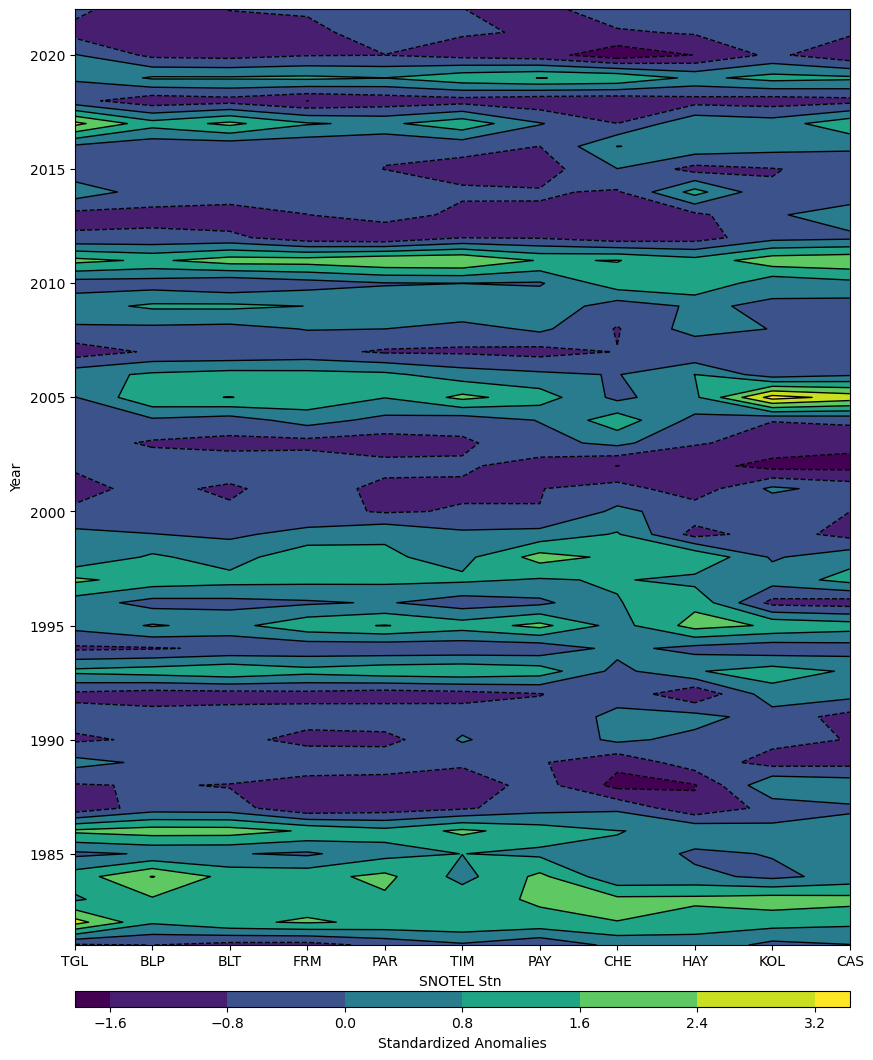

In [11]:
#Question 8. Create a hovmuller diagram of standardized anomalies zstar showing all 11 sites
# important: this is plotting a 1d-array of the 11 sites, a 1d-array of the years (from snow.index), and a 2d-array zstar
fig,ax = plt.subplots(figsize=(10,15))
some_x = np.arange(1,nos+1)
print(some_x)
some_y = snow.index
print(some_y)
cf = ax.contourf(some_x,some_y,zstar,extend='both')
cs = ax.contour(some_x,some_y,zstar,colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
ax.set_xticks(some_x)
ax.set_xticklabels(stns[1:nos+1])
ax.set_xlabel('SNOTEL Stn ')
ax.set_ylabel('Year')
cbar.set_label('Standardized Anomalies')
ax1.set_title('U0035056')
plt.savefig('figure_assign_3.png')

In [12]:
#Question 9
#compute spearman correlation between each  time series using the panda corr function
cors = snow.corr(method='spearman')
print(cors)

     TGL  BLP  BLT  FRM  PAR  TIM  PAY  CHE  HAY  KOL  CAS
TGL  1.0  0.8  0.8  0.8  0.8  0.7  0.7  0.4  0.7  0.4  0.4
BLP  0.8  1.0  1.0  0.9  0.8  0.9  0.8  0.5  0.7  0.5  0.5
BLT  0.8  1.0  1.0  0.9  0.8  0.9  0.8  0.5  0.7  0.5  0.5
FRM  0.8  0.9  0.9  1.0  0.9  0.8  0.8  0.5  0.7  0.5  0.5
PAR  0.8  0.8  0.8  0.9  1.0  0.9  0.8  0.5  0.8  0.5  0.5
TIM  0.7  0.9  0.9  0.8  0.9  1.0  0.9  0.6  0.8  0.6  0.6
PAY  0.7  0.8  0.8  0.8  0.8  0.9  1.0  0.7  0.7  0.6  0.6
CHE  0.4  0.5  0.5  0.5  0.5  0.6  0.7  1.0  0.6  0.4  0.4
HAY  0.7  0.7  0.7  0.7  0.8  0.8  0.7  0.6  1.0  0.4  0.5
KOL  0.4  0.5  0.5  0.5  0.5  0.6  0.6  0.4  0.4  1.0  0.9
CAS  0.4  0.5  0.5  0.5  0.5  0.6  0.6  0.4  0.5  0.9  1.0


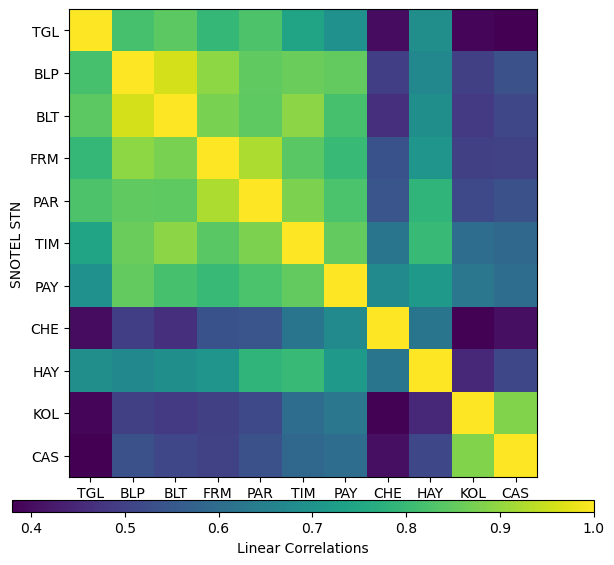

In [14]:
#Question 10. plot the spearman correlations between each time serie
fig,ax = plt.subplots(figsize=(7.5,7.5))
cf = ax.imshow(cors)
ax.set_xticks(np.arange(0,nos))
ax.set_yticks(np.arange(0,nos))
ax.set_xticklabels(stns[1:nos+1])
ax.set_yticklabels(stns[1:nos+1])
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)

ax.set_ylabel('SNOTEL STN')

cbar.set_label('Linear Correlations')
ax1.set_title('U0035056')
plt.savefig('figure_assign_4.png')

In [17]:
#compute principal components
from numpy import linalg as la
#convert the panda array of snow standaradized anomalies to a numpy array
snow_a = zstar.to_numpy()
print(snow_a)

#starting from the matrix of correlations
l, principal_axes = la.eig(cors)
# sort results wrt. the magnitude of the eigenvalues
idx = l.argsort()[::-1]
print(idx)
l, principal_axes = l[idx], principal_axes[:, idx]

# the eigenvalues in decreasing order and percent variance explained
print('eigenvalues and % variance explained')
for no in range(0,nos):
    print("l = %.1f percent %.1f"% (l[no], 100.*l[no]/nos))
    principal_axes[:,no] = principal_axes[:,no] *np.sqrt(l[no])
    
#  principal component time series computed by multiplying the original time series by the weights
#  defined for each location and then scaled by the eigenvalues
principal_components = snow_a.dot(principal_axes)/l
print(type(principal_components))

[[-0.91151909 -0.79154313 -1.08154662 -1.11991891 -0.58045959 -0.12538868
  -0.65422114  0.23789697  0.56828705 -0.24724942 -0.0276882 ]
 [ 2.72331781  0.91264674  1.48029168  1.67997121  1.46642422  1.5089879
   1.37678181  1.5886599   1.06340409  1.17787536  0.98780577]
 [ 0.67773861  1.5104241   1.43883798  1.29781351  1.46642422  1.28199116
   1.71248478  1.78730151  1.81461615  1.98511387  1.87226826]
 [ 1.21273624  2.43330846  1.32276764  1.33680919  1.80247977  0.53744182
   1.79641052  0.17830449  0.20975402 -0.18745398  0.26713263]
 [-0.17196353  0.08414828  0.0542846  -0.12942853  0.53463383  0.80983792
   0.63823528  0.73450099 -0.18292502  0.05172781  0.33264837]
 [ 1.76346911  1.99284093  1.97773601  1.50059107  1.06926766  1.77230413
   1.20893033  0.81395763  0.68779806  0.28094368  0.33264837]
 [-1.35210538 -0.40351221 -0.45145047 -1.47867921 -1.25257069 -0.92441723
  -0.31851817 -0.13952208 -1.42925412 -0.53626074 -0.10958287]
 [-0.87218102 -0.7286192  -0.84940593 -1.2

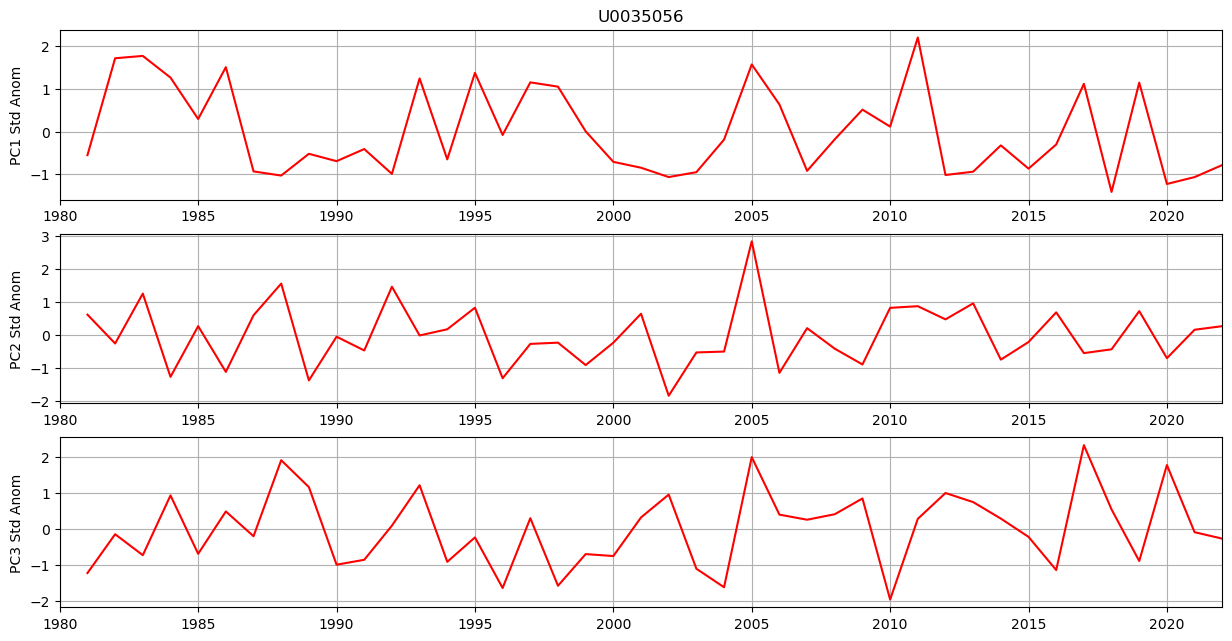

In [19]:
#Question 11. plot the first 3 principal component time series
fig,(ax1,ax2,ax3)= plt.subplots(3,1,figsize=(15,7.5))
#some code
ax1.plot(snow.index,principal_components[:,0],label='PC1',color='red')
ax2.plot(snow.index,principal_components[:,1],label='PC2',color='red')
ax3.plot(snow.index,principal_components[:,2],label='PC3',color='red')
ax1.set_ylabel('PC1 Std Anom')
ax1.set(xlim=(1980,2022))
ax1.grid()
ax2.set_ylabel('PC2 Std Anom')
ax2.set(xlim=(1980,2022))
ax2.grid()
ax3.set_ylabel('PC3 Std Anom')
ax3.set(xlim=(1980,2022))
ax3.grid()
ax1.set_title('U0035056')
plt.savefig('figure_assign_5.png')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


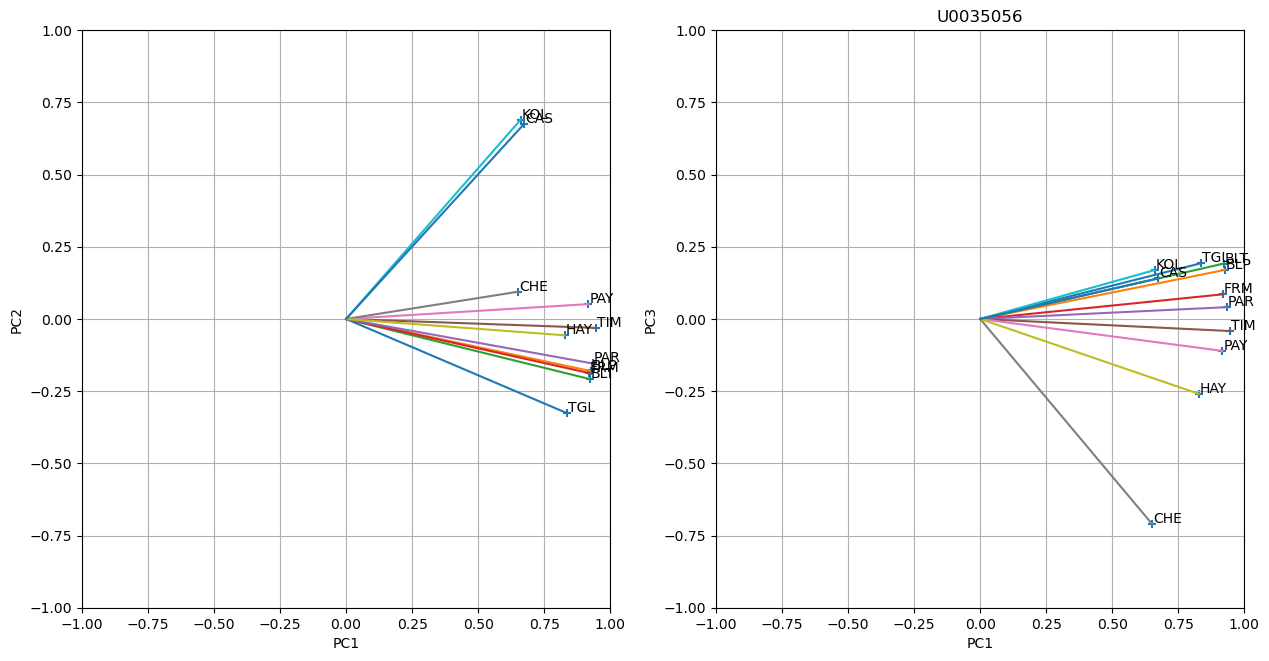

In [21]:
#Question 12. plot the correlations between the 1st, 2nd, and 3rd PC and the original time series
# as scatterplots with lines from the origin to those correlation values
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,7.5))
#define a column of zeros as zeros
zeros = np.zeros(nos)
print(zeros)
ax1.scatter(principal_axes[:, 0],principal_axes[:, 1],marker='+')
ax1.plot([zeros,principal_axes[:,0]],[zeros,principal_axes[:, 1]])
for i in range(nos):
    ax1.text(x=principal_axes[i, 0]+.004,y=principal_axes[i, 1]+.004,s=stns[i+1])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set(xlim=(-1,1))
ax1.set(ylim=(-1,1))
ax1.grid()

ax2.scatter(principal_axes[:, 0],principal_axes[:, 2],marker='+')
ax2.plot([zeros,principal_axes[:,0]],[zeros,principal_axes[:, 2]])
for i in range(nos):
    ax2.text(x=principal_axes[i, 0]+.004,y=principal_axes[i, 2]+.004,s=stns[i+1])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax2.set(xlim=(-1,1))
ax2.set(ylim=(-1,1))
ax2.grid()
ax2.set_title('U0035056')
plt.savefig('figure_assign_6.png')